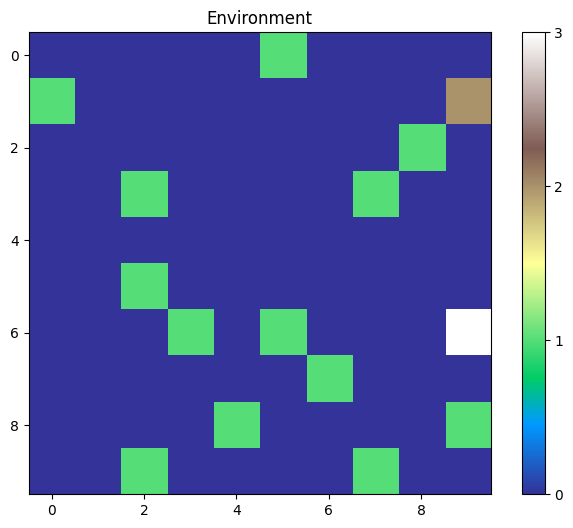

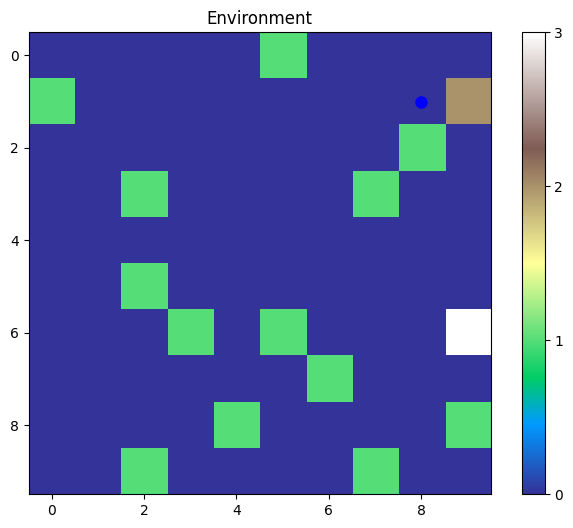

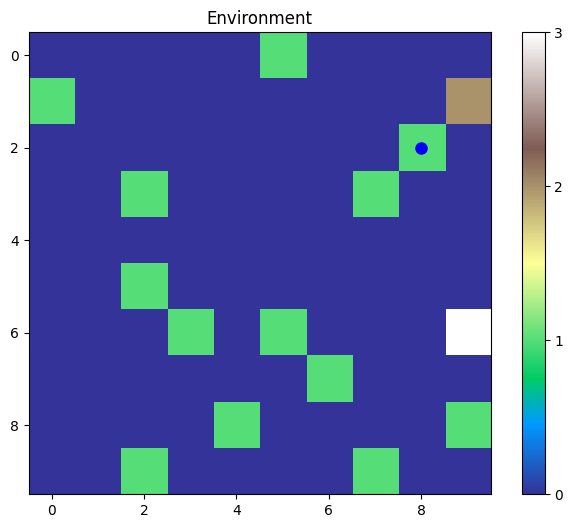

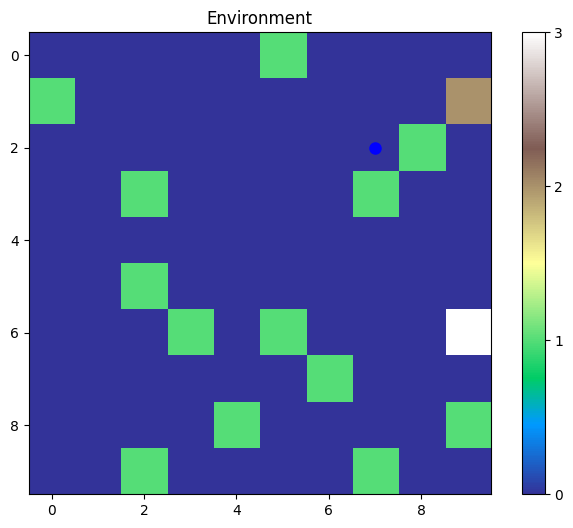

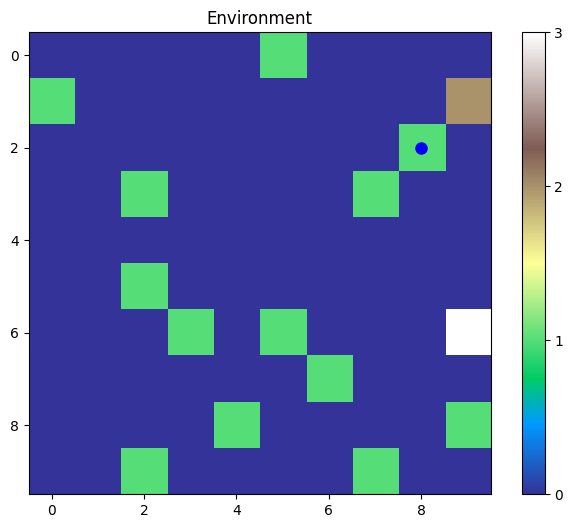

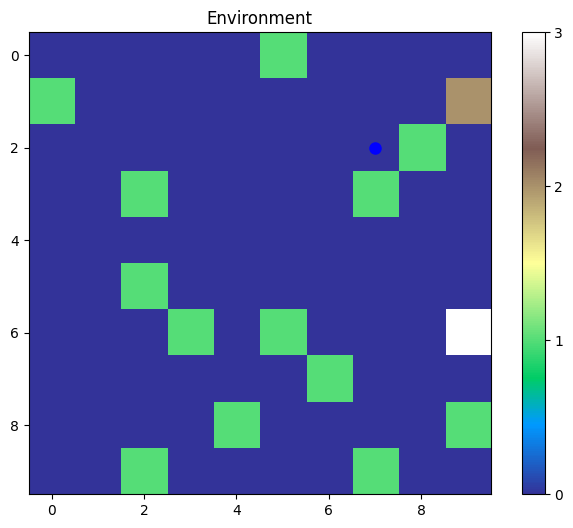

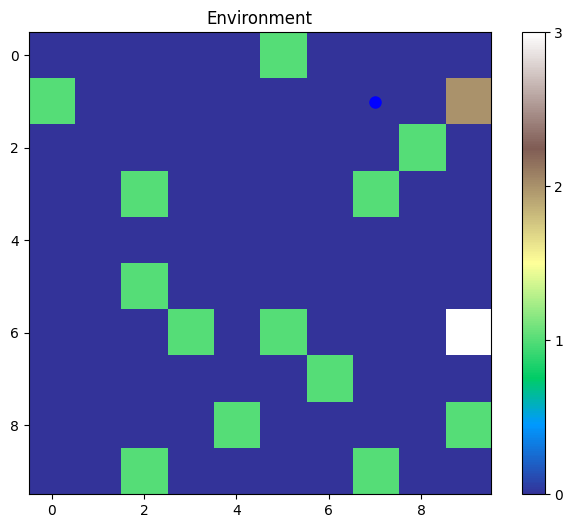

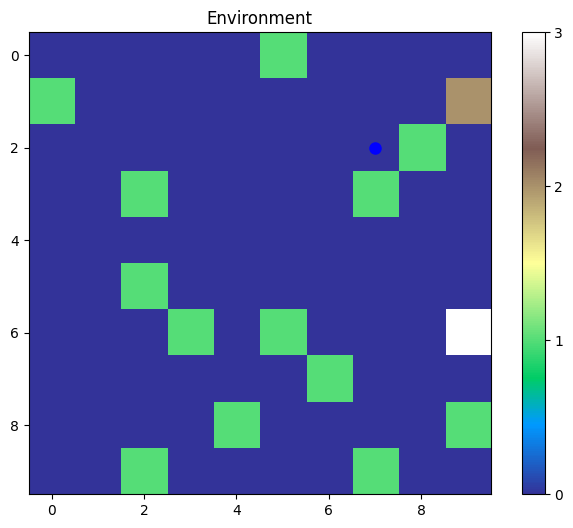

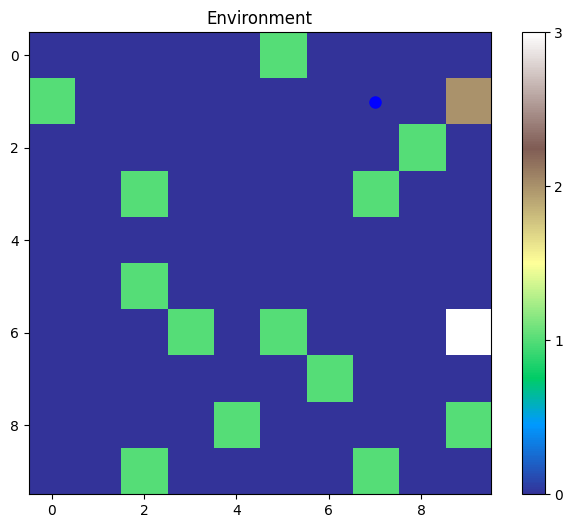

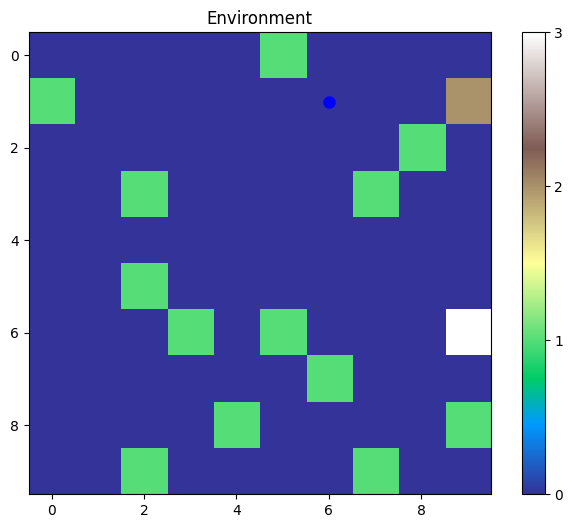

Battery recharged to 100%.


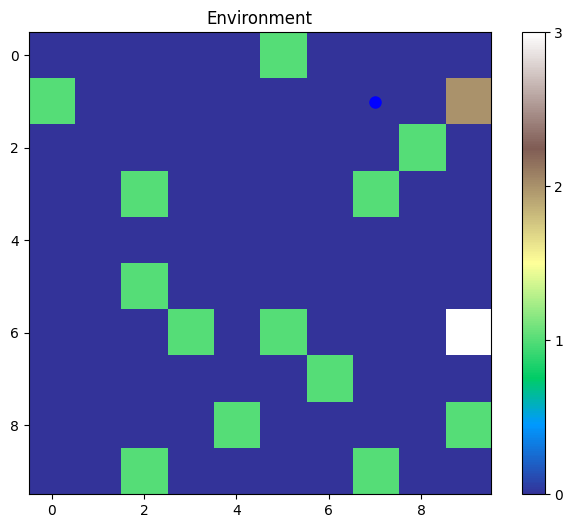

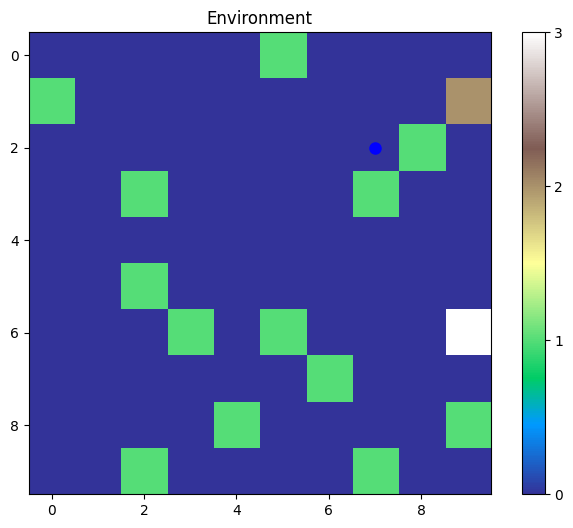

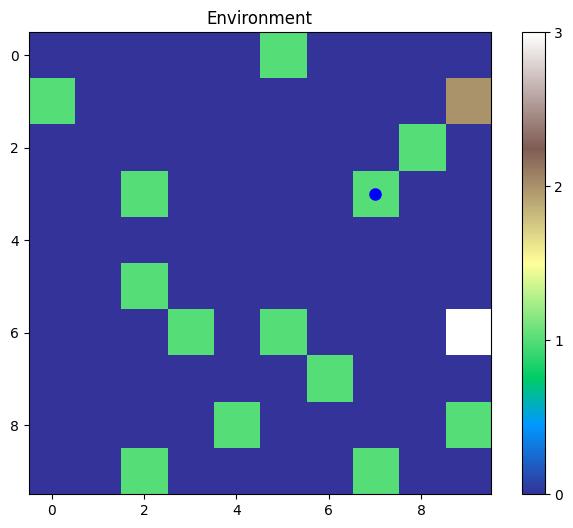

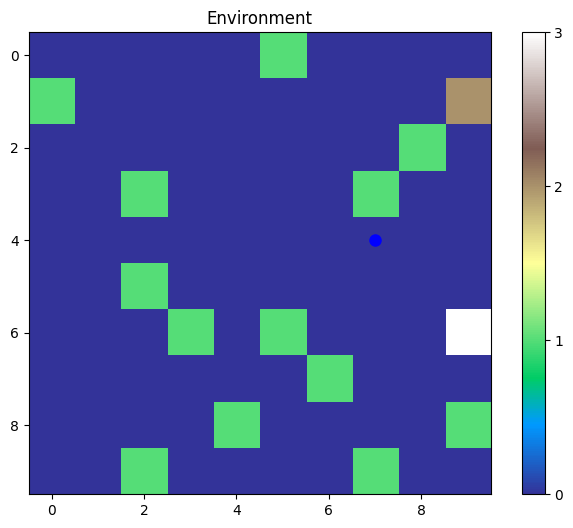

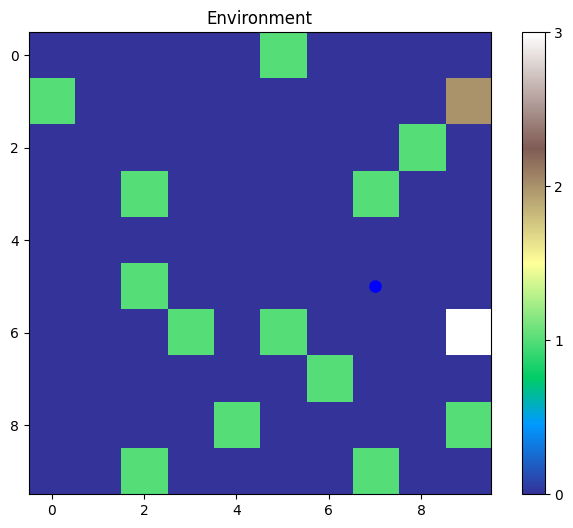

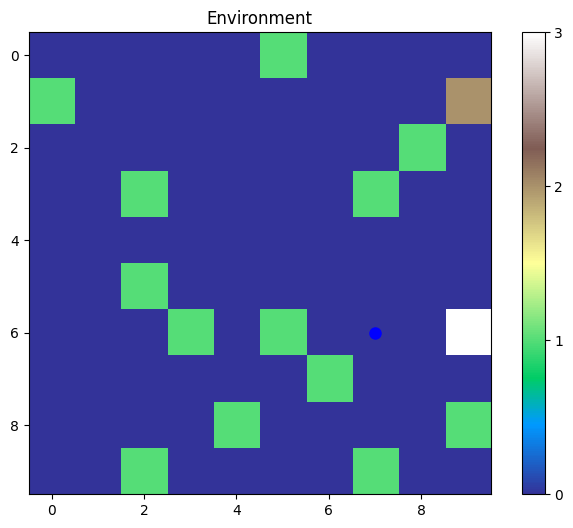

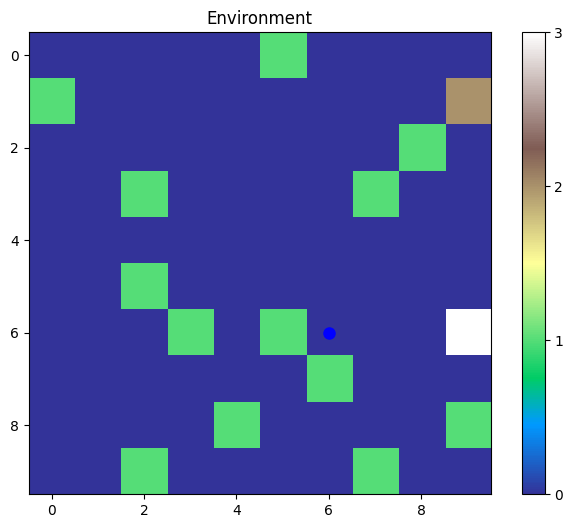

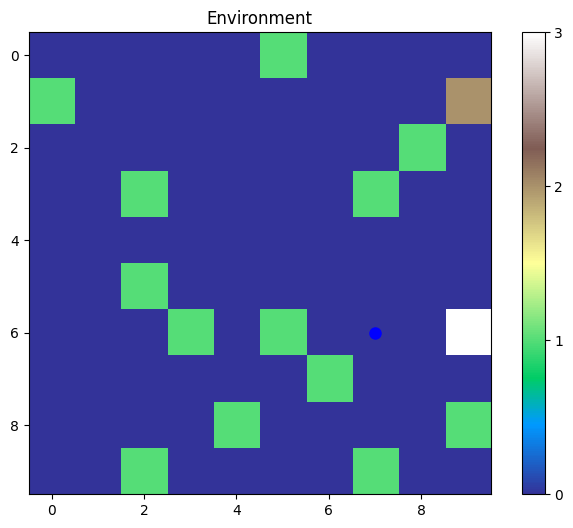

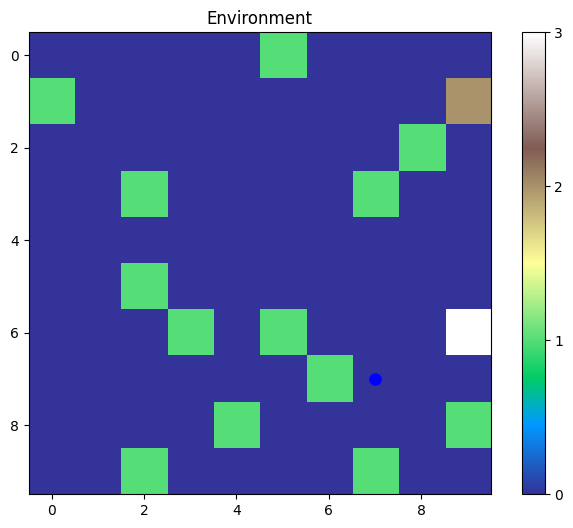

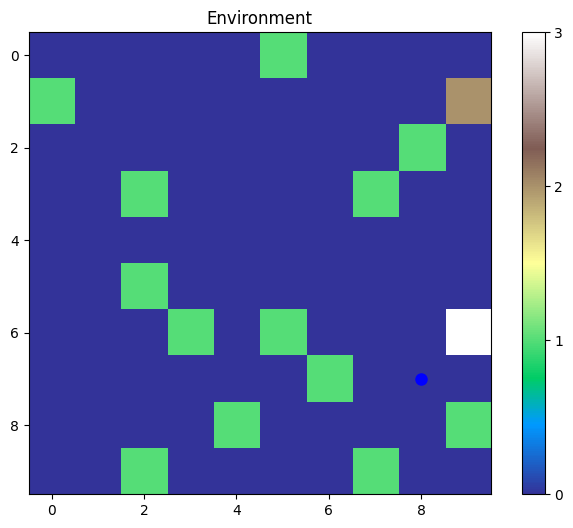

Battery recharged to 100%.


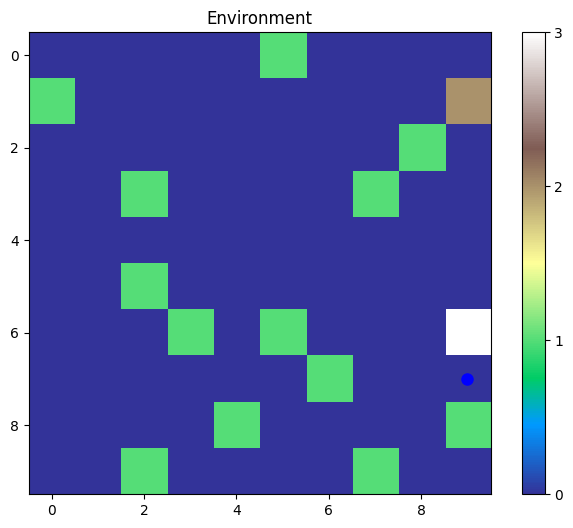

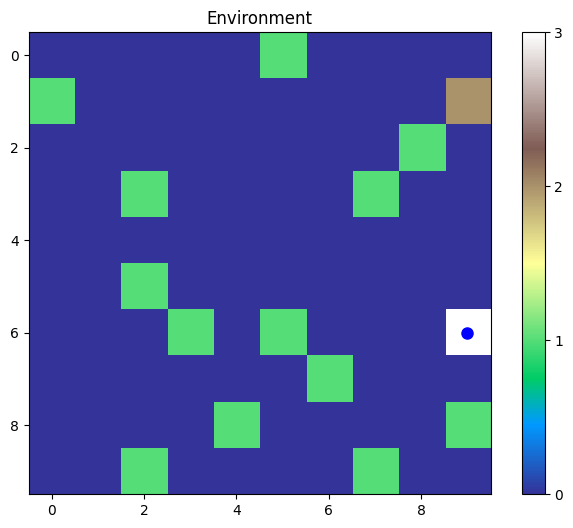

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
import random

class Environment:
    def __init__(self):
        self.grid = np.zeros((10, 10), dtype=int)
        self.start = (random.randint(0, 9), random.randint(0, 9))
        self.end = (random.randint(0, 9), random.randint(0, 9))
        self.obstacles = [(random.randint(0, 9), random.randint(0, 9)) for _ in range(15)]
        for obstacle in self.obstacles:
            self.grid[obstacle] = 1
        self.grid[self.start] = 2
        self.grid[self.end] = 3

    def visualize(self, path=None, agent_position=None):
        plt.figure(figsize=(8, 6))
        plt.imshow(self.grid, cmap='terrain')
        plt.title('Environment')
        plt.colorbar(ticks=[0, 1, 2, 3])
        if path:
            for node in path:
                plt.plot(node[1], node[0], 'ro', markersize=5)
        if agent_position:
            plt.plot(agent_position[1], agent_position[0], 'bo', markersize=8)
        plt.show()

class Agent:
    def __init__(self, environment):
        self.environment = environment
        self.position = environment.start
        self.battery = 100

    def move(self, direction):
        if direction == 'up' and self.position[0] > 0:
            self.position = (self.position[0] - 1, self.position[1])
        elif direction == 'down' and self.position[0] < 9:
            self.position = (self.position[0] + 1, self.position[1])
        elif direction == 'left' and self.position[1] > 0:
            self.position = (self.position[0], self.position[1] - 1)
        elif direction == 'right' and self.position[1] < 9:
            self.position = (self.position[0], self.position[1] + 1)
        self.battery -= 10
        if self.battery <= 0:
            self.recharge()

    def recharge(self):
        self.battery = 100
        print("Battery recharged to 100%.")

    def visualize(self):
        self.environment.visualize(agent_position=self.position)

class Simulation:
    def __init__(self, environment, agent):
        self.environment = environment
        self.agent = agent

    def run(self):
        while self.agent.position != self.environment.end:
            direction = self.get_next_move()
            self.agent.move(direction)
            self.environment.visualize(agent_position=self.agent.position)

    def get_next_move(self):
        # Implement pathfinding algorithm here (UCS or A*)
        # For demonstration, return random move
        return random.choice(['up', 'down', 'left', 'right'])

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(environment, start, end):
    start_node = Node(start)
    end_node = Node(end)
    open_list = PriorityQueue()
    open_list.put((0, start_node))
    visited = set()

    while not open_list.empty():
        current_node = open_list.get()[1]
        visited.add(current_node.position)

        if current_node.position == end_node.position:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] >= 0 and node_position[0] < 10 and node_position[1] >= 0 and node_position[1] < 10 and environment.grid[node_position] != 1 and node_position not in visited:
                new_node = Node(node_position, current_node)
                children.append(new_node)

        for child in children:
            child.g = current_node.g + 1
            child.h = heuristic(child.position, end_node.position)
            child.f = child.g + child.h
            open_list.put((child.f, child))

if __name__ == "__main__":
    env = Environment()
    env.visualize()
    robot = Agent(env)
    sim = Simulation(env, robot)
    sim.run()